In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import chardet

nfl_eq_data = pd.read_csv("C:/Users/ML/Downloads/ML_new/database.csv")

np.random.seed(0) 

In [2]:
nfl_eq_data.sample(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
335,12/26/1965,03:53:12,-5.201,151.583,Earthquake,80.1,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM851979,ISCGEM,ISCGEM,ISCGEM,Automatic
8952,04/03/1988,01:33:06,49.917,78.945,Nuclear Explosion,0.0,NaN,NaN,6.1,MB,...,96.0,NaN,NaN,NaN,0.80,USP0003EM3,US,US,US,Reviewed
21724,04/22/2013,04:36:37,51.098,179.392,Earthquake,18.0,NaN,196.0,5.5,MWB,...,NaN,126.8,NaN,NaN,1.18,USB000GDCD,US,US,US,Reviewed
20018,03/19/2010,08:54:44,-35.541,-73.475,Earthquake,14.4,NaN,264.0,5.5,MWC,...,NaN,60.2,NaN,NaN,NaN,USP000H9P8,US,GUC,GCMT,Reviewed
4309,04/20/1977,23:42:51,-9.890,160.348,Earthquake,19.0,NaN,NaN,7.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000NGG,US,US,US,Reviewed


In [3]:
nfl_eq_data.shape

(23412, 21)

In [4]:
missing_values_count = nfl_eq_data.isnull().sum()
missing_values_count

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [5]:
#percentage of missing data
total_cells = np.product(nfl_eq_data.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

29.581695996355144

I'll drop out some of features that I think are useless or didn't recorded

In [6]:
nfl_eq_data = nfl_eq_data.dropna(axis=1)
print(nfl_eq_data.shape)

(23412, 12)


In [7]:
fl_eq_data = nfl_eq_data.drop(['Time', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status'], axis=1)

In [8]:
nfl_eq_data['Date'].dtype

dtype('O')

In [9]:
fl_eq_data['Date_parsed'] = pd.to_datetime(fl_eq_data['Date'], format = "%m/%d/%Y", errors = 'coerce')
fl_eq_data['Year'] = fl_eq_data['Date_parsed'].dt.year
fl_eq_data['Year'].head()

0    1965.0
1    1965.0
2    1965.0
3    1965.0
4    1965.0
Name: Year, dtype: float64

In [10]:
types = fl_eq_data['Type'].unique()
types.sort()
types

array(['Earthquake', 'Explosion', 'Nuclear Explosion', 'Rock Burst'],
      dtype=object)

In [11]:
#deleting all other types of but earthquake
for i in fl_eq_data.index:
    if fl_eq_data.loc[i, 'Type'] != 'Earthquake':
        fl_eq_data.loc[i, 'Type'] = np.nan

In [14]:
fl_eq_data = fl_eq_data.dropna()
final_eq_data = fl_eq_data.drop(['Date', 'Type'], axis=1)
missing_values_count = final_eq_data.isnull().sum()
print('Size of Final data:', final_eq_data.shape)
print('Dropped data percentage:', np.product(final_eq_data.shape)/np.product(nfl_eq_data.shape)*100)
print('Dropped instances:', nfl_eq_data.shape[0] - final_eq_data.shape[0])
print('Dropped instances percentage:', (nfl_eq_data.shape[0] - final_eq_data.shape[0])/(nfl_eq_data.shape[0])*100)
missing_values_count

Size of Final data: (23229, 6)
Dropped data percentage: 49.609174782162995
Dropped instances: 183
Dropped instances percentage: 0.7816504356740134


Latitude       0
Longitude      0
Depth          0
Magnitude      0
Date_parsed    0
Year           0
dtype: int64

In [15]:
#X db and y db
final_eq_data.to_csv('final_eq_data.csv')
y = final_eq_data.Magnitude.values
X = final_eq_data[["Latitude", "Longitude", "Depth", "Year"]]

In [75]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# scoring = make_scorer(mean_squared_error, greater_is_better=False)
parameters = {'max_depth':range(3, 9)} 
reg_cv = GridSearchCV(DecisionTreeRegressor(criterion='mse', random_state=0),
              param_grid=parameters, cv=20, refit=True)

reg_cv.fit(X_train, y_train)
reg_cv.best_params_
tree_model = reg_cv.best_estimator_
result = reg_cv.cv_results_
prediction = reg_cv.best_estimator_.predict(X_test)

print(result)
print(result['mean_test_score'])
print (reg_cv.best_score_, reg_cv.best_params_, reg_cv.best_estimator_)


{'mean_fit_time': array([0.04045233, 0.04985286, 0.06180354, 0.06965395, 0.07935444,
       0.08970513]), 'std_fit_time': array([0.00545447, 0.00127576, 0.00250218, 0.00195651, 0.00115228,
       0.00151994]), 'mean_score_time': array([0.0011001 , 0.00095009, 0.00110006, 0.00100007, 0.00120009,
       0.00110005]), 'std_score_time': array([2.99998151e-04, 2.17964744e-04, 3.00010076e-04, 1.58148994e-07,
       4.00030636e-04, 2.99974306e-04]), 'param_max_depth': masked_array(data=[3, 4, 5, 6, 7, 8],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}], 'split0_test_score': array([ 0.03437545,  0.04162461,  0.04006919,  0.03815774, -0.00540722,
       -0.02596758]), 'split1_test_score': array([ 0.01243563,  0.01776889,  0.01302498,  0.00382493, -0.00535641,
       -0.00306118]), 'split2_test_score': array([ 0.014

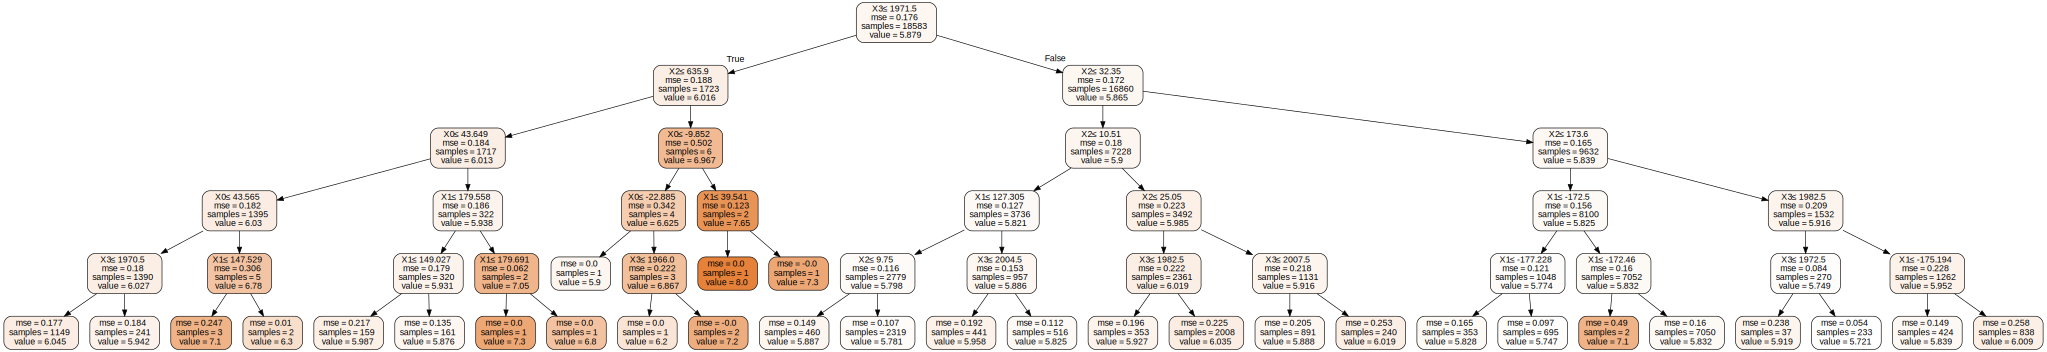

In [89]:
from sklearn import tree
import graphviz
reg_cv.fit(X_train, y_train)
dot_data = tree.export_graphviz(reg_cv.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("simple_tree")

dot_data = tree.export_graphviz(reg_cv.best_estimator_, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data)  
graph 

In [86]:
import pickle
s = pickle.dumps(reg_cv.best_estimator_)
reg_cv2 = pickle.loads(s)
reg_cv2.predict(X_test[0:10])



array([5.83182979, 5.8251938 , 5.88843996, 5.78081069, 5.88843996,
       5.83182979, 5.92719547, 5.83182979, 5.88843996, 5.83867925])

In [85]:
y_test[0:10]

array([7.1, 5.6, 6. , 5.7, 5.9, 5.6, 5.7, 5.8, 5.6, 6.2])